# WASHINGTON STATE HOME LOANS 2016 - Prediction Model

Purpose is to look for -

Factors affecting loan approval decisions?

In [69]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pathOfDataFile = 'E:/Data Science/SpringBoard DS/Capstone Project 1/Code/Dataset/washington-state-home-mortgage-hdma2016/Washington_State_HDMA-2016-cleaned.csv'

In [3]:
waHomeLoanDF = pd.read_csv(pathOfDataFile, low_memory=True)

In [4]:
pd.set_option('display.max_columns', 50)
waHomeLoanDF.head()

,tract_to_msamd_income,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_name,purchaser_type_name,property_type_name,preapproval_name,owner_occupancy_name,msamd_name,loan_type_name,loan_purpose_name,lien_status_name,hoepa_status_name,county_name,co_applicant_sex_name,co_applicant_ethnicity_name,census_tract_number,as_of_year,application_date_indicator,applicant_sex_name,applicant_ethnicity_name,agency_name,action_taken_name
0,121.690002,8381.0,23.790001,2175.0,2660.0,227,73300.0,116.0,Washington,Freddie Mac (FHLMC),One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,"Portland, Vancouver, Hillsboro - OR, WA",Conventional,Refinancing,Secured by a first lien,Not a HOEPA loan,Clark County,Male,Not Hispanic or Latino,413.27,2016,0,Female,Not Hispanic or Latino,Consumer Financial Protection Bureau,Loan originated
1,83.370003,4915.0,23.990000,1268.0,1777.0,240,57900.0,42.0,Washington,"Life insurance company, credit union, mortgage...",One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,Walla Walla - WA,FHA-insured,Home purchase,Secured by a first lien,Not a HOEPA loan,Walla Walla County,No co-applicant,No co-applicant,9208.01,2016,0,Male,Hispanic or Latino,Department of Housing and Urban Development,Loan originated
2,91.129997,5075.0,11.820000,1136.0,1838.0,241,73300.0,117.0,Washington,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,"Portland, Vancouver, Hillsboro - OR, WA",Conventional,Refinancing,Secured by a first lien,Not a HOEPA loan,Clark County,Female,Not Hispanic or Latino,414.00,2016,0,Male,Not Hispanic or Latino,Department of Housing and Urban Development,Loan originated
3,146.169998,5032.0,8.590000,1525.0,1820.0,351,73300.0,216.5,Washington,Loan was not originated or was not sold in cal...,One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,"Portland, Vancouver, Hillsboro - OR, WA",Conventional,Refinancing,Secured by a first lien,Not a HOEPA loan,Clark County,Female,"Information not provided by applicant in mail,...",405.10,2016,0,Male,"Information not provided by applicant in mail,...",National Credit Union Administration,Loan originated
4,162.470001,5183.0,10.500000,1705.0,2104.0,417,78100.0,114.0,Washington,Freddie Mac (FHLMC),One-to-four family dwelling (other than manufa...,Not applicable,Owner-occupied as a principal dwelling,"Bremerton, Silverdale - WA",Conventional,Home improvement,Secured by a first lien,Not a HOEPA loan,Kitsap County,Male,Not Hispanic or Latino,907.00,2016,0,Female,Not Hispanic or Latino,Federal Deposit Insurance Corporation,Loan originated


In [5]:
waHomeLoanDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465951 entries, 0 to 465950
Data columns (total 28 columns):
tract_to_msamd_income             465951 non-null float64
population                        465951 non-null float64
minority_population               465951 non-null float64
number_of_owner_occupied_units    465951 non-null float64
number_of_1_to_4_family_units     465951 non-null float64
loan_amount_000s                  465951 non-null int64
hud_median_family_income          465951 non-null float64
applicant_income_000s             465951 non-null float64
state_name                        465951 non-null object
purchaser_type_name               465951 non-null object
property_type_name                465951 non-null object
preapproval_name                  465951 non-null object
owner_occupancy_name              465951 non-null object
msamd_name                        465951 non-null object
loan_type_name                    465951 non-null object
loan_purpose_name           

In [6]:
waHomeLoanDF.agency_name.value_counts()

Department of Housing and Urban Development    238231
Consumer Financial Protection Bureau           142499
Federal Deposit Insurance Corporation           45978
National Credit Union Administration            30418
Office of the Comptroller of the Currency        5581
Federal Reserve System                           3244
Name: agency_name, dtype: int64

### Inspect action_taken_name

In [7]:
waHomeLoanDF.action_taken_name.value_counts()

Loan originated                                        263650
Application denied by financial institution             64006
Application withdrawn by applicant                      60121
Loan purchased by the institution                       48336
File closed for incompleteness                          18119
Application approved but not accepted                   11706
Preapproval request approved but not accepted              10
Preapproval request denied by financial institution         3
Name: action_taken_name, dtype: int64

'Preapproval request approved but not accepted' and 'Preapproval request denied by financial institution' have very few entries and will be removed.

In [8]:
waHomeLoanDF = waHomeLoanDF[~waHomeLoanDF.action_taken_name.isin(['Application withdrawn by applicant', 
                                                                'Preapproval request approved but not accepted', 
                                                                'Preapproval request denied by financial institution'])]

In [9]:
waHomeLoanDF.action_taken_name.value_counts()

Loan originated                                263650
Application denied by financial institution     64006
Loan purchased by the institution               48336
File closed for incompleteness                  18119
Application approved but not accepted           11706
Name: action_taken_name, dtype: int64

### Add new column for loan approval with binary values

**loan_approval** column is added with binary vlaues **0** and **1**. 1 for loan approval and 0 for loan rejection.

Following values of **action_taken_name** are added as **1 (loan approved)** in "loan_approval"
- Loan originated
- Loan purchased by the institution

Following values of **action_taken_name** are added as **0 (loan rejection)** in "loan_approval"
- Application denied by financial institution
- File closed for incompleteness

In [10]:
# function to set 'Loan originated' and 'Loan purchased by the institution' to one and loan denial to 0
def actionTakenBinaryConv(x):
    if x == 'Loan originated':
        return 1
    elif x == 'Loan purchased by the institution':
        return 1
    else:
        return 0

In [11]:
#add new column for loan approval
waHomeLoanDF['loan_approval'] = waHomeLoanDF.action_taken_name.apply(actionTakenBinaryConv)

In [12]:
#inspect loan approval
waHomeLoanDF.loan_approval.value_counts()

1    311986
0     93831
Name: loan_approval, dtype: int64

### Inspect all the columns
Check if all the columns contain appropriate data. Else delete values that don't have relevant information. 

In [13]:
#inspect owner occupany
waHomeLoanDF.owner_occupancy_name.value_counts()

Owner-occupied as a principal dwelling        370247
Not owner-occupied as a principal dwelling     33941
Not applicable                                  1629
Name: owner_occupancy_name, dtype: int64

**Remove Not applicable values as this doesn't convey any information regarding occupancy**

In [14]:
waHomeLoanDF = waHomeLoanDF[waHomeLoanDF.owner_occupancy_name != 'Not applicable']

In [15]:
#inspect owner occupany
waHomeLoanDF.owner_occupancy_name.value_counts()

Owner-occupied as a principal dwelling        370247
Not owner-occupied as a principal dwelling     33941
Name: owner_occupancy_name, dtype: int64

In [16]:
#inspect property_type_name
waHomeLoanDF.property_type_name.value_counts()

One-to-four family dwelling (other than manufactured housing)    391395
Manufactured housing                                              12593
Multifamily dwelling                                                200
Name: property_type_name, dtype: int64

In [17]:
#inspect loan_purpose_name
waHomeLoanDF.loan_purpose_name.value_counts()

Refinancing         212683
Home purchase       170310
Home improvement     21195
Name: loan_purpose_name, dtype: int64

In [18]:
#inspect preapproval_name
waHomeLoanDF.preapproval_name.value_counts()

Not applicable                   344494
Preapproval was not requested     49476
Preapproval was requested         10218
Name: preapproval_name, dtype: int64

In [19]:
waHomeLoanDF.purchaser_type_name.value_counts()

Loan was not originated or was not sold in calendar year covered by register    158280
Fannie Mae (FNMA)                                                                75840
Ginnie Mae (GNMA)                                                                60791
Freddie Mac (FHLMC)                                                              51708
Life insurance company, credit union, mortgage bank, or finance company          21485
Commercial bank, savings bank or savings association                             18253
Other type of purchaser                                                          11918
Affiliate institution                                                             3984
Private securitization                                                            1911
Farmer Mac (FAMC)                                                                   18
Name: purchaser_type_name, dtype: int64

In [20]:
waHomeLoanDF.msamd_name.value_counts()

Seattle, Bellevue, Everett - WA            172417
Tacoma, Lakewood - WA                       52760
Spokane, Spokane Valley - WA                37986
Portland, Vancouver, Hillsboro - OR, WA     34841
Olympia, Tumwater - WA                      15645
Bremerton, Silverdale - WA                  15612
Kennewick, Richland - WA                    14707
Bellingham - WA                             12118
Unknown                                     11132
Yakima - WA                                  9997
Wenatchee - WA                               9872
Mount Vernon, Anacortes - WA                 6868
Longview - WA                                6654
Walla Walla - WA                             2668
Lewiston - ID, WA                             911
Name: msamd_name, dtype: int64

In [21]:
waHomeLoanDF.loan_type_name.value_counts()

Conventional          287406
FHA-insured            58146
VA-guaranteed          54639
FSA/RHS-guaranteed      3997
Name: loan_type_name, dtype: int64

In [22]:
waHomeLoanDF.lien_status_name.value_counts()

Secured by a first lien          343013
Not applicable                    48163
Secured by a subordinate lien      7876
Not secured by a lien              5136
Name: lien_status_name, dtype: int64

In [23]:
waHomeLoanDF.hoepa_status_name.value_counts()

Not a HOEPA loan    404175
HOEPA loan              13
Name: hoepa_status_name, dtype: int64

In [24]:
waHomeLoanDF.county_name.value_counts()

King County            119845
Pierce County           52760
Snohomish County        51134
Clark County            33203
Spokane County          25585
Kitsap County           15531
Thurston County         15241
Whatcom County          11078
Benton County            9975
Yakima County            8549
Skagit County            6850
Island County            6100
Cowlitz County           5881
Franklin County          3929
Chelan County            3666
Lewis County             3328
Mason County             3282
Clallam County           3107
Grant County             3102
Grays Harbor County      2895
Walla Walla County       2550
Kittitas County          2442
Stevens County           1860
Douglas County           1812
Jefferson County         1578
Whitman County           1252
Okanogan County          1169
Pacific County           1002
Asotin County             911
San Juan County           818
Klickitat County          802
Pend Oreille County       693
Skamania County           624
Adams Coun

In [25]:
waHomeLoanDF.applicant_sex_name.value_counts()

Male                                                                                 244321
Female                                                                                94739
Information not provided by applicant in mail, Internet, or telephone application     33088
Not applicable                                                                        32040
Name: applicant_sex_name, dtype: int64

In [26]:
waHomeLoanDF.applicant_ethnicity_name.value_counts()

Not Hispanic or Latino                                                               301997
Information not provided by applicant in mail, Internet, or telephone application     50827
Not applicable                                                                        32089
Hispanic or Latino                                                                    19275
Name: applicant_ethnicity_name, dtype: int64

In [27]:
waHomeLoanDF.agency_name.value_counts()

Department of Housing and Urban Development    202882
Consumer Financial Protection Bureau           127555
Federal Deposit Insurance Corporation           39239
National Credit Union Administration            26753
Office of the Comptroller of the Currency        4763
Federal Reserve System                           2996
Name: agency_name, dtype: int64

In [28]:
waHomeLoanDF.co_applicant_sex_name.value_counts()

No co-applicant                                                                      179679
Female                                                                               141918
Male                                                                                  34628
Not applicable                                                                        28343
Information not provided by applicant in mail, Internet, or telephone application     19620
Name: co_applicant_sex_name, dtype: int64

In [29]:
waHomeLoanDF.co_applicant_ethnicity_name.value_counts()

No co-applicant                                                                      179679
Not Hispanic or Latino                                                               156350
Information not provided by applicant in mail, Internet, or telephone application     30324
Not applicable                                                                        28375
Hispanic or Latino                                                                     9460
Name: co_applicant_ethnicity_name, dtype: int64

### Change columns with text to binary

In [30]:
# function to convert columns to binary values
def applyBinary(feature):
    featureValList = feature.value_counts().index
    for i in range(len(featureValList)):
        feature.replace(featureValList[i], i, inplace=True)

In [31]:
# Fucntion to columns with object data to binary
def convertBinary(dataframe):
    dataframe.head()
    #print(dataframe.columns)
    for col in dataframe.columns[2:]:
        if dataframe[col].dtype.name == 'object':
            applyBinary(dataframe[col])

In [32]:
#Change columns with text to binary
convertBinary(waHomeLoanDF)

## Model Prediction

Four models are used for loan approval prediction
- Logistic Regression from SKLearn
- GLM and Logistic Regression from StatsModels
- Random Forest
- XGBOOST

Data will be trained on all the above four algorithms. Trained model will be used on test data to claculate 
- Accuracy score
- Precision and Recall
- Confusion matrix
- ROC Area

### Feature Selection

Columns **state_name** and **as_of_year** have same vlaue for all the samples and **action_taken_name** is target variable, so these wil be removed from feature list.

**loan_approval** is binary target variable.

In [33]:
# create a feature list
features = list(waHomeLoanDF.columns.values)
features.remove('state_name')
features.remove('as_of_year')
features.remove('loan_approval')
features.remove('action_taken_name')
print(features)

['tract_to_msamd_income', 'population', 'minority_population', 'number_of_owner_occupied_units', 'number_of_1_to_4_family_units', 'loan_amount_000s', 'hud_median_family_income', 'applicant_income_000s', 'purchaser_type_name', 'property_type_name', 'preapproval_name', 'owner_occupancy_name', 'msamd_name', 'loan_type_name', 'loan_purpose_name', 'lien_status_name', 'hoepa_status_name', 'county_name', 'co_applicant_sex_name', 'co_applicant_ethnicity_name', 'census_tract_number', 'application_date_indicator', 'applicant_sex_name', 'applicant_ethnicity_name', 'agency_name']


### Loan Approval Graph

In [115]:
waHomeLoanDF.loan_approval.value_counts()

1    310593
0     93595
Name: loan_approval, dtype: int64

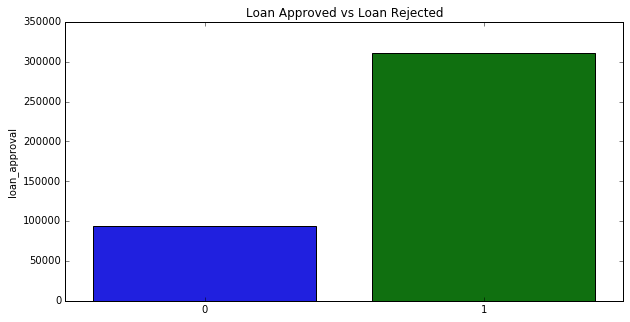

In [114]:
plt.subplots(figsize=(10,5))
sns.barplot(y=waHomeLoanDF.loan_approval.value_counts(), 
            x=waHomeLoanDF.loan_approval.value_counts().index, 
            data=waHomeLoanDF)
plt.title("Loan Approved vs Loan Rejected")
plt.show()

# Logistic Regression from SKLearn

Following method is followed for modeling
- Split data for training and testing with all the features.
- **Recursive Feature elimination(RFE)** method is used for feature selection. 
- After find most important features from RFE, again split data for train and test based on features selected.
- Second split data for tuning hyperparameter **C** using **GridSearchCV**.
- **Confusion Matrix** and **Precision** and **Recall** is computed for determining accuracy.
- Above steps are repeated for all 25 features by eliminating one at a time.

Number of features 25
Selected features [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
Feature rank [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Best parameter is 10 with score is 0.87649296428
Test data accuracy score with GridSearchCV: 0.891140305302

Training data
              precision    recall  f1-score   support

           0       0.79      0.73      0.76     74872
           1       0.92      0.94      0.93    248478

   micro avg       0.89      0.89      0.89    323350
   macro avg       0.85      0.84      0.84    323350
weighted avg       0.89      0.89      0.89    323350

Confusion matrix
[[ 54811  20061]
 [ 14970 233508]]

 Accuracy for Logistic Regression: 89.17  

print Area Under curve score: 0.95507 


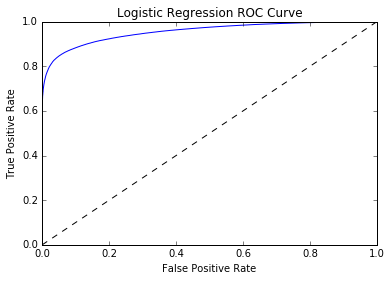


 Test data
              precision    recall  f1-score   support

           0       0.78      0.73      0.76     18723
           1       0.92      0.94      0.93     62115

   micro avg       0.89      0.89      0.89     80838
   macro avg       0.85      0.84      0.84     80838
weighted avg       0.89      0.89      0.89     80838

()
Confusion matrix
[[13729  4994]
 [ 3806 58309]]
()

 Accuracy for Logistic Regression: 89.17  

 print Area Under curve score: 0.95507
0.9547506395740226


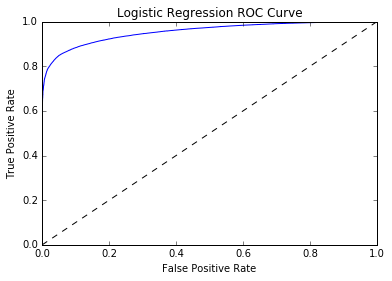

Number of features 24
Selected features [ True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
Feature rank [1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Best parameter is 1 with score is 0.897164063708
Test data accuracy score with GridSearchCV: 0.895321507212

Training data
              precision    recall  f1-score   support

           0       0.75      0.83      0.79     74872
           1       0.95      0.92      0.93    248478

   micro avg       0.90      0.90      0.90    323350
   macro avg       0.85      0.87      0.86    323350
weighted avg       0.90      0.90      0.90    323350

Confusion matrix
[[ 62383  12489]
 [ 20710 227768]]

 Accuracy for Logistic Regression: 89.73  

print Area Under curve score: 0.95984 


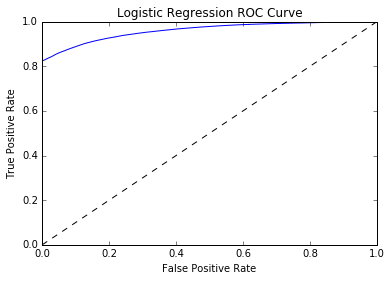


 Test data
              precision    recall  f1-score   support

           0       0.75      0.83      0.79     18723
           1       0.95      0.91      0.93     62115

   micro avg       0.90      0.90      0.90     80838
   macro avg       0.85      0.87      0.86     80838
weighted avg       0.90      0.90      0.90     80838

()
Confusion matrix
[[15541  3182]
 [ 5280 56835]]
()

 Accuracy for Logistic Regression: 89.73  

 print Area Under curve score: 0.95984
0.9591784919754515


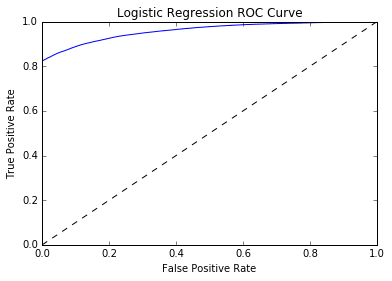

Number of features 23
Selected features [ True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True]
Feature rank [1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1]
Best parameter is 10 with score is 0.897151693212
Test data accuracy score with GridSearchCV: 0.896076102823

Training data
              precision    recall  f1-score   support

           0       0.76      0.82      0.79     74872
           1       0.94      0.92      0.93    248478

   micro avg       0.90      0.90      0.90    323350
   macro avg       0.85      0.87      0.86    323350
weighted avg       0.90      0.90      0.90    323350

Confusion matrix
[[ 61459  13413]
 [ 19857 228621]]

 Accuracy for Logistic Regression: 89.71  

print Area Under curve score: 0.95923 


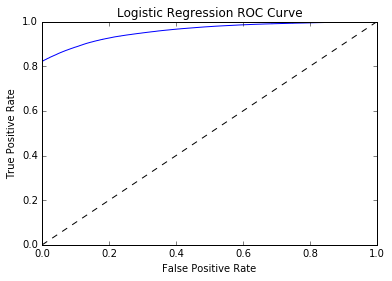


 Test data
              precision    recall  f1-score   support

           0       0.75      0.82      0.79     18723
           1       0.94      0.92      0.93     62115

   micro avg       0.90      0.90      0.90     80838
   macro avg       0.85      0.87      0.86     80838
weighted avg       0.90      0.90      0.90     80838

()
Confusion matrix
[[15349  3374]
 [ 5027 57088]]
()

 Accuracy for Logistic Regression: 89.71  

 print Area Under curve score: 0.95923
0.9585288990715306


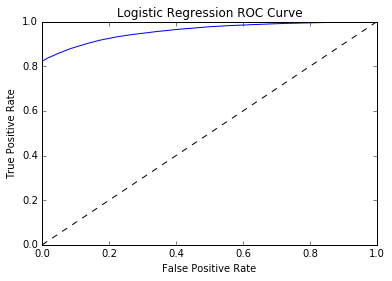

Number of features 22
Selected features [ True False  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True]
Feature rank [1 2 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1]
Best parameter is 100 with score is 0.897538271223
Test data accuracy score with GridSearchCV: 0.896471956258

Training data
              precision    recall  f1-score   support

           0       0.75      0.84      0.79     74872
           1       0.95      0.92      0.93    248478

   micro avg       0.90      0.90      0.90    323350
   macro avg       0.85      0.88      0.86    323350
weighted avg       0.90      0.90      0.90    323350

Confusion matrix
[[ 62575  12297]
 [ 20778 227700]]

 Accuracy for Logistic Regression: 89.77  

print Area Under curve score: 0.96004 


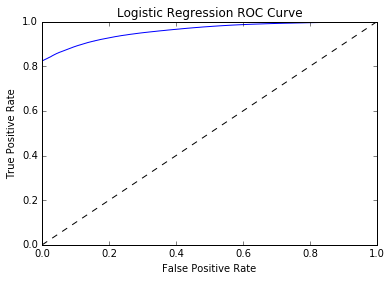


 Test data
              precision    recall  f1-score   support

           0       0.75      0.83      0.79     18723
           1       0.95      0.92      0.93     62115

   micro avg       0.90      0.90      0.90     80838
   macro avg       0.85      0.87      0.86     80838
weighted avg       0.90      0.90      0.90     80838

()
Confusion matrix
[[15605  3118]
 [ 5251 56864]]
()

 Accuracy for Logistic Regression: 89.77  

 print Area Under curve score: 0.96004
0.9593938827682074


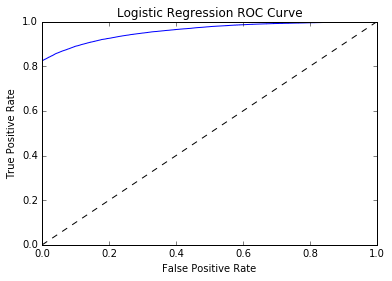

Number of features 21
Selected features [ True False  True False  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True]
Feature rank [1 3 1 2 1 1 5 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1]
Best parameter is 10 with score is 0.897590845833
Test data accuracy score with GridSearchCV: 0.896496697098

Training data
              precision    recall  f1-score   support

           0       0.75      0.84      0.79     74872
           1       0.95      0.92      0.93    248478

   micro avg       0.90      0.90      0.90    323350
   macro avg       0.85      0.88      0.86    323350
weighted avg       0.90      0.90      0.90    323350

Confusion matrix
[[ 62626  12246]
 [ 20794 227684]]

 Accuracy for Logistic Regression: 89.78  

print Area Under curve score: 0.96017 


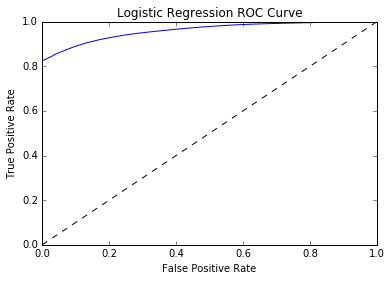


 Test data
              precision    recall  f1-score   support

           0       0.75      0.83      0.79     18723
           1       0.95      0.92      0.93     62115

   micro avg       0.90      0.90      0.90     80838
   macro avg       0.85      0.87      0.86     80838
weighted avg       0.90      0.90      0.90     80838

()
Confusion matrix
[[15630  3093]
 [ 5274 56841]]
()

 Accuracy for Logistic Regression: 89.78  

 print Area Under curve score: 0.96017
0.959564714722378


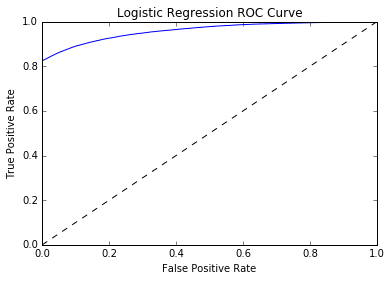

Number of features 20
Selected features [ True False  True False False  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True]
Feature rank [1 4 1 3 2 1 6 1 1 1 1 1 1 1 1 1 1 1 1 1 5 1 1 1 1]
Best parameter is 0.1 with score is 0.897436214628
Test data accuracy score with GridSearchCV: 0.895717360647

Training data
              precision    recall  f1-score   support

           0       0.75      0.84      0.79     74872
           1       0.95      0.92      0.93    248478

   micro avg       0.90      0.90      0.90    323350
   macro avg       0.85      0.88      0.86    323350
weighted avg       0.90      0.90      0.90    323350

Confusion matrix
[[ 62696  12176]
 [ 21101 227377]]

 Accuracy for Logistic Regression: 89.71  

print Area Under curve score: 0.96016 


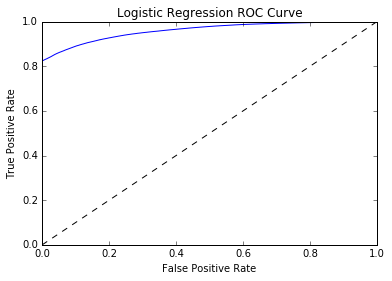


 Test data
              precision    recall  f1-score   support

           0       0.75      0.83      0.79     18723
           1       0.95      0.91      0.93     62115

   micro avg       0.90      0.90      0.90     80838
   macro avg       0.85      0.87      0.86     80838
weighted avg       0.90      0.90      0.90     80838

()
Confusion matrix
[[15625  3098]
 [ 5332 56783]]
()

 Accuracy for Logistic Regression: 89.71  

 print Area Under curve score: 0.96016
0.9595634550265302


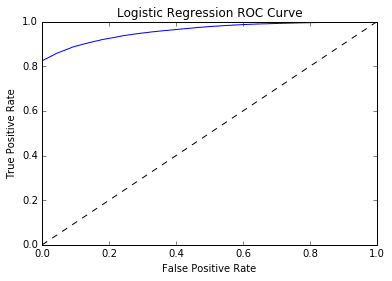

Number of features 19
Selected features [ True False  True False False False False  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True]
Feature rank [1 5 1 4 3 2 7 1 1 1 1 1 1 1 1 1 1 1 1 1 6 1 1 1 1]
Best parameter is 0.001 with score is 0.895982681305
Test data accuracy score with GridSearchCV: 0.895383359311

Training data
              precision    recall  f1-score   support

           0       0.76      0.81      0.78     74872
           1       0.94      0.92      0.93    248478

   micro avg       0.90      0.90      0.90    323350
   macro avg       0.85      0.86      0.86    323350
weighted avg       0.90      0.90      0.90    323350

Confusion matrix
[[ 60281  14591]
 [ 18914 229564]]

 Accuracy for Logistic Regression: 89.64  

print Area Under curve score: 0.95887 


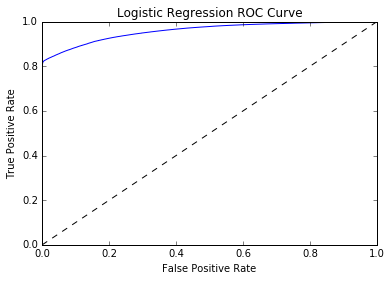


 Test data
              precision    recall  f1-score   support

           0       0.76      0.80      0.78     18723
           1       0.94      0.92      0.93     62115

   micro avg       0.90      0.90      0.90     80838
   macro avg       0.85      0.86      0.86     80838
weighted avg       0.90      0.90      0.90     80838

()
Confusion matrix
[[15046  3677]
 [ 4780 57335]]
()

 Accuracy for Logistic Regression: 89.64  

 print Area Under curve score: 0.95887
0.9581460486980615


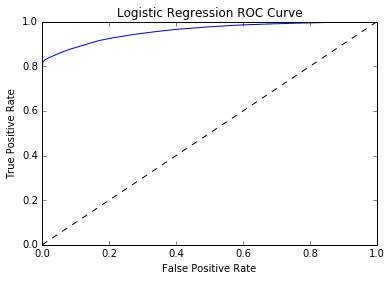

Number of features 18
Selected features [ True False False False False False False  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True]
Feature rank [1 6 2 5 4 3 8 1 1 1 1 1 1 1 1 1 1 1 1 1 7 1 1 1 1]
Best parameter is 100 with score is 0.895447657337
Test data accuracy score with GridSearchCV: 0.8946906158

Training data
              precision    recall  f1-score   support

           0       0.74      0.84      0.79     74872
           1       0.95      0.91      0.93    248478

   micro avg       0.90      0.90      0.90    323350
   macro avg       0.85      0.87      0.86    323350
weighted avg       0.90      0.90      0.90    323350

Confusion matrix
[[ 62524  12348]
 [ 21461 227017]]

 Accuracy for Logistic Regression: 89.54  

print Area Under curve score: 0.95990 


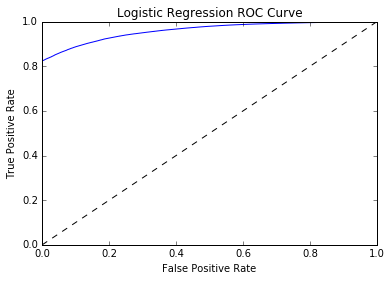


 Test data
              precision    recall  f1-score   support

           0       0.74      0.83      0.79     18723
           1       0.95      0.91      0.93     62115

   micro avg       0.89      0.89      0.89     80838
   macro avg       0.85      0.87      0.86     80838
weighted avg       0.90      0.89      0.90     80838

()
Confusion matrix
[[15597  3126]
 [ 5387 56728]]
()

 Accuracy for Logistic Regression: 89.54  

 print Area Under curve score: 0.95990
0.9593461974763099


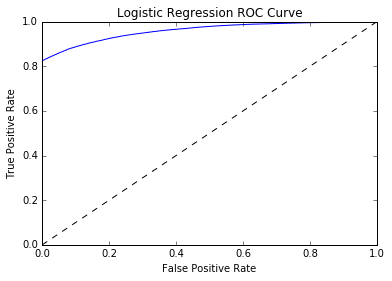

Number of features 17
Selected features [ True False False False False False False  True  True  True  True  True
 False  True  True  True  True  True  True  True False  True  True  True
  True]
Feature rank [1 7 3 6 5 4 9 1 1 1 1 1 2 1 1 1 1 1 1 1 8 1 1 1 1]
Best parameter is 0.1 with score is 0.895633214783
Test data accuracy score with GridSearchCV: 0.894208169425

Training data
              precision    recall  f1-score   support

           0       0.74      0.84      0.79     74872
           1       0.95      0.91      0.93    248478

   micro avg       0.90      0.90      0.90    323350
   macro avg       0.85      0.87      0.86    323350
weighted avg       0.90      0.90      0.90    323350

Confusion matrix
[[ 62530  12342]
 [ 21482 226996]]

 Accuracy for Logistic Regression: 89.54  

print Area Under curve score: 0.95989 


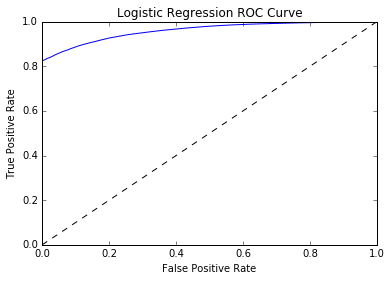


 Test data
              precision    recall  f1-score   support

           0       0.74      0.83      0.78     18723
           1       0.95      0.91      0.93     62115

   micro avg       0.89      0.89      0.89     80838
   macro avg       0.84      0.87      0.86     80838
weighted avg       0.90      0.89      0.90     80838

()
Confusion matrix
[[15581  3142]
 [ 5410 56705]]
()

 Accuracy for Logistic Regression: 89.54  

 print Area Under curve score: 0.95989
0.9593228299033686


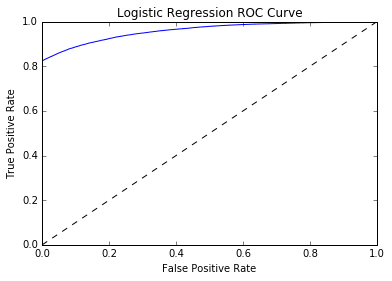

Number of features 16
Selected features [False False False False False False False  True  True  True  True  True
 False  True  True  True  True  True  True  True False  True  True  True
  True]
Feature rank [ 2  8  4  7  6  5 10  1  1  1  1  1  3  1  1  1  1  1  1  1  9  1  1  1
  1]
Best parameter is 0.001 with score is 0.896248646977
Test data accuracy score with GridSearchCV: 0.895284395952

Training data
              precision    recall  f1-score   support

           0       0.76      0.80      0.78     74872
           1       0.94      0.92      0.93    248478

   micro avg       0.90      0.90      0.90    323350
   macro avg       0.85      0.86      0.86    323350
weighted avg       0.90      0.90      0.90    323350

Confusion matrix
[[ 60165  14707]
 [ 18882 229596]]

 Accuracy for Logistic Regression: 89.61  

print Area Under curve score: 0.95931 


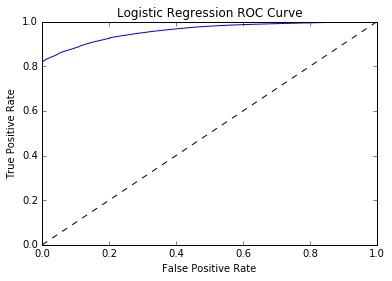


 Test data
              precision    recall  f1-score   support

           0       0.76      0.80      0.78     18723
           1       0.94      0.92      0.93     62115

   micro avg       0.90      0.90      0.90     80838
   macro avg       0.85      0.86      0.86     80838
weighted avg       0.90      0.90      0.90     80838

()
Confusion matrix
[[15047  3676]
 [ 4789 57326]]
()

 Accuracy for Logistic Regression: 89.61  

 print Area Under curve score: 0.95931
0.9587391964797444


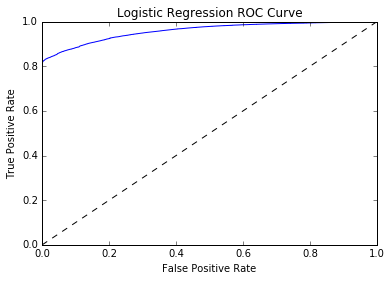

Number of features 15
Selected features [False False False False False False False False  True  True  True  True
 False  True  True  True  True  True  True  True False  True  True  True
  True]
Feature rank [ 3  9  5  8  7  6 11  2  1  1  1  1  4  1  1  1  1  1  1  1 10  1  1  1
  1]
Best parameter is 0.001 with score is 0.887586206897
Test data accuracy score with GridSearchCV: 0.883891239269

Training data
              precision    recall  f1-score   support

           0       0.72      0.81      0.76     74872
           1       0.94      0.91      0.92    248478

   micro avg       0.88      0.88      0.88    323350
   macro avg       0.83      0.86      0.84    323350
weighted avg       0.89      0.88      0.89    323350

Confusion matrix
[[ 60613  14259]
 [ 23190 225288]]

 Accuracy for Logistic Regression: 88.42  

print Area Under curve score: 0.95583 


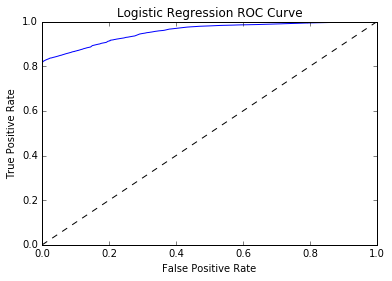


 Test data
              precision    recall  f1-score   support

           0       0.72      0.81      0.76     18723
           1       0.94      0.91      0.92     62115

   micro avg       0.88      0.88      0.88     80838
   macro avg       0.83      0.86      0.84     80838
weighted avg       0.89      0.88      0.89     80838

()
Confusion matrix
[[15135  3588]
 [ 5798 56317]]
()

 Accuracy for Logistic Regression: 88.42  

 print Area Under curve score: 0.95583
0.9553580541635596


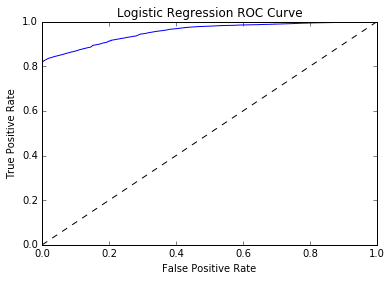

Number of features 14
Selected features [False False False False False False False False  True  True  True  True
 False  True  True  True  True  True  True  True False  True False  True
  True]
Feature rank [ 4 10  6  9  8  7 12  3  1  1  1  1  5  1  1  1  1  1  1  1 11  1  2  1
  1]
Best parameter is 0.001 with score is 0.885715169321
Test data accuracy score with GridSearchCV: 0.886093174002

Training data
              precision    recall  f1-score   support

           0       0.73      0.81      0.77     74872
           1       0.94      0.91      0.92    248478

   micro avg       0.89      0.89      0.89    323350
   macro avg       0.83      0.86      0.85    323350
weighted avg       0.89      0.89      0.89    323350

Confusion matrix
[[ 60529  14343]
 [ 22476 226002]]

 Accuracy for Logistic Regression: 88.61  

print Area Under curve score: 0.95584 


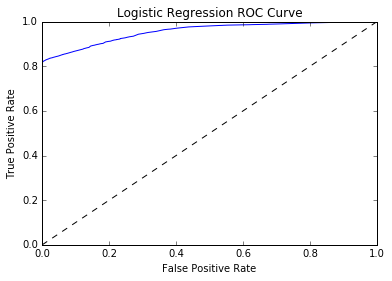


 Test data
              precision    recall  f1-score   support

           0       0.73      0.81      0.77     18723
           1       0.94      0.91      0.92     62115

   micro avg       0.89      0.89      0.89     80838
   macro avg       0.83      0.86      0.85     80838
weighted avg       0.89      0.89      0.89     80838

()
Confusion matrix
[[15135  3588]
 [ 5620 56495]]
()

 Accuracy for Logistic Regression: 88.61  

 print Area Under curve score: 0.95584
0.9554077764653295


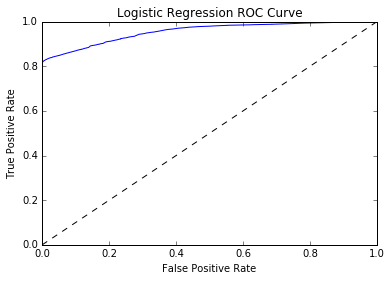

Number of features 13
Selected features [False False False False False False False False  True  True  True  True
 False  True  True  True  True False  True  True False  True False  True
  True]
Feature rank [ 5 11  7 10  9  8 13  4  1  1  1  1  6  1  1  1  1  2  1  1 12  1  3  1
  1]
Best parameter is 0.001 with score is 0.883680222669
Test data accuracy score with GridSearchCV: 0.883829387169

Training data
              precision    recall  f1-score   support

           0       0.72      0.80      0.76     74872
           1       0.94      0.91      0.92    248478

   micro avg       0.88      0.88      0.88    323350
   macro avg       0.83      0.86      0.84    323350
weighted avg       0.89      0.88      0.89    323350

Confusion matrix
[[ 60254  14618]
 [ 22977 225501]]

 Accuracy for Logistic Regression: 88.37  

print Area Under curve score: 0.95540 


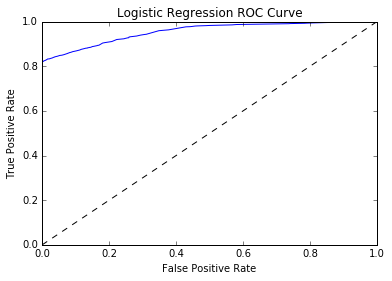


 Test data
              precision    recall  f1-score   support

           0       0.72      0.80      0.76     18723
           1       0.94      0.91      0.92     62115

   micro avg       0.88      0.88      0.88     80838
   macro avg       0.83      0.86      0.84     80838
weighted avg       0.89      0.88      0.89     80838

()
Confusion matrix
[[15063  3660]
 [ 5731 56384]]
()

 Accuracy for Logistic Regression: 88.37  

 print Area Under curve score: 0.95540
0.9550328944204756


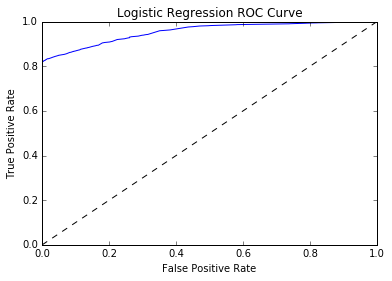

Number of features 12
Selected features [False False False False False False False False  True  True  True  True
 False  True  True  True  True False False  True False  True False  True
  True]
Feature rank [ 6 12  8 11 10  9 14  5  1  1  1  1  7  1  1  1  1  3  2  1 13  1  4  1
  1]
Best parameter is 0.001 with score is 0.883856502242
Test data accuracy score with GridSearchCV: 0.883965461788

Training data
              precision    recall  f1-score   support

           0       0.73      0.80      0.76     74872
           1       0.94      0.91      0.92    248478

   micro avg       0.88      0.88      0.88    323350
   macro avg       0.83      0.86      0.84    323350
weighted avg       0.89      0.88      0.89    323350

Confusion matrix
[[ 60157  14715]
 [ 22805 225673]]

 Accuracy for Logistic Regression: 88.40  

print Area Under curve score: 0.95534 


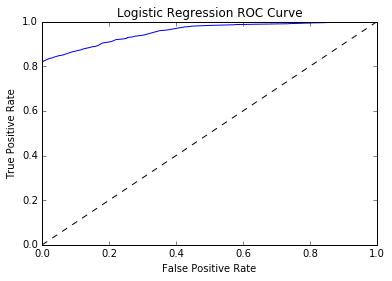


 Test data
              precision    recall  f1-score   support

           0       0.73      0.80      0.76     18723
           1       0.94      0.91      0.92     62115

   micro avg       0.88      0.88      0.88     80838
   macro avg       0.83      0.86      0.84     80838
weighted avg       0.89      0.88      0.89     80838

()
Confusion matrix
[[15035  3688]
 [ 5692 56423]]
()

 Accuracy for Logistic Regression: 88.40  

 print Area Under curve score: 0.95534
0.9550091403401735


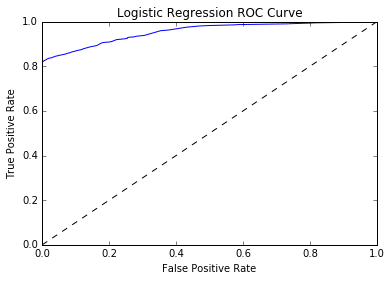

Number of features 11
Selected features [False False False False False False False False  True  True  True False
 False  True  True  True  True False False  True False  True False  True
  True]
Feature rank [ 7 13  9 12 11 10 15  6  1  1  1  2  8  1  1  1  1  4  3  1 14  1  5  1
  1]
Best parameter is 1 with score is 0.88532859131
Test data accuracy score with GridSearchCV: 0.886018951483

Training data
              precision    recall  f1-score   support

           0       0.72      0.84      0.77     74872
           1       0.95      0.90      0.92    248478

   micro avg       0.89      0.89      0.89    323350
   macro avg       0.83      0.87      0.85    323350
weighted avg       0.89      0.89      0.89    323350

Confusion matrix
[[ 62736  12136]
 [ 24922 223556]]

 Accuracy for Logistic Regression: 88.54  

print Area Under curve score: 0.95572 


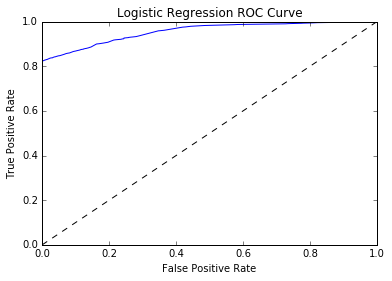


 Test data
              precision    recall  f1-score   support

           0       0.72      0.84      0.77     18723
           1       0.95      0.90      0.92     62115

   micro avg       0.89      0.89      0.89     80838
   macro avg       0.83      0.87      0.85     80838
weighted avg       0.89      0.89      0.89     80838

()
Confusion matrix
[[15685  3038]
 [ 6176 55939]]
()

 Accuracy for Logistic Regression: 88.54  

 print Area Under curve score: 0.95572
0.9553186261134545


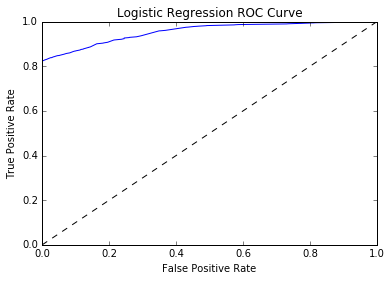

Number of features 10
Selected features [False False False False False False False False  True  True  True False
 False  True  True  True  True False False  True False  True False False
  True]
Feature rank [ 8 14 10 13 12 11 16  7  1  1  1  3  9  1  1  1  1  5  4  1 15  1  6  2
  1]
Best parameter is 0.001 with score is 0.883216329055
Test data accuracy score with GridSearchCV: 0.883161384497

Training data
              precision    recall  f1-score   support

           0       0.73      0.80      0.76     74872
           1       0.94      0.91      0.92    248478

   micro avg       0.88      0.88      0.88    323350
   macro avg       0.83      0.85      0.84    323350
weighted avg       0.89      0.88      0.89    323350

Confusion matrix
[[ 59740  15132]
 [ 22566 225912]]

 Accuracy for Logistic Regression: 88.34  

print Area Under curve score: 0.95524 


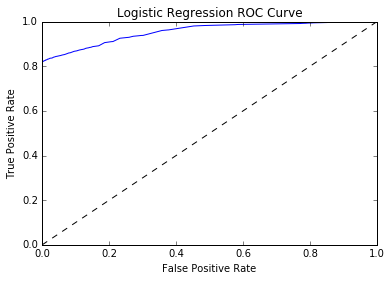


 Test data
              precision    recall  f1-score   support

           0       0.73      0.80      0.76     18723
           1       0.94      0.91      0.92     62115

   micro avg       0.88      0.88      0.88     80838
   macro avg       0.83      0.85      0.84     80838
weighted avg       0.89      0.88      0.88     80838

()
Confusion matrix
[[14910  3813]
 [ 5632 56483]]
()

 Accuracy for Logistic Regression: 88.34  

 print Area Under curve score: 0.95524
0.9549412203776019


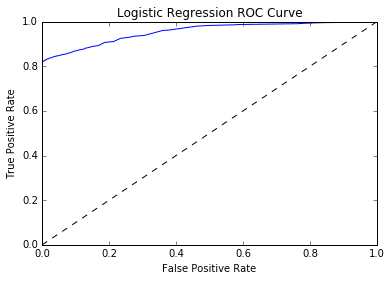

Number of features 9
Selected features [False False False False False False False False  True  True  True False
 False  True  True  True  True False False False False  True False False
  True]
Feature rank [ 9 15 11 14 13 12 17  8  1  1  1  4 10  1  1  1  1  6  5  2 16  1  7  3
  1]
Best parameter is 0.001 with score is 0.891170558219
Test data accuracy score with GridSearchCV: 0.877879215221

Training data
              precision    recall  f1-score   support

           0       0.69      0.84      0.76     74872
           1       0.95      0.89      0.92    248478

   micro avg       0.88      0.88      0.88    323350
   macro avg       0.82      0.86      0.84    323350
weighted avg       0.89      0.88      0.88    323350

Confusion matrix
[[ 62667  12205]
 [ 27542 220936]]

 Accuracy for Logistic Regression: 87.71  

print Area Under curve score: 0.95472 


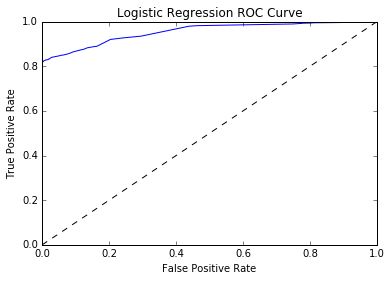


 Test data
              precision    recall  f1-score   support

           0       0.70      0.84      0.76     18723
           1       0.95      0.89      0.92     62115

   micro avg       0.88      0.88      0.88     80838
   macro avg       0.82      0.86      0.84     80838
weighted avg       0.89      0.88      0.88     80838

()
Confusion matrix
[[15697  3026]
 [ 6846 55269]]
()

 Accuracy for Logistic Regression: 87.71  

 print Area Under curve score: 0.95472
0.954215147598369


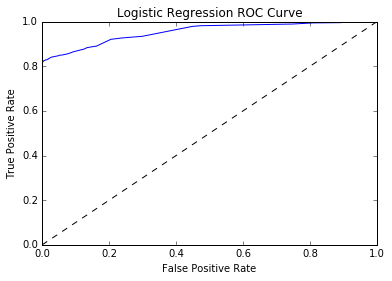

Number of features 8
Selected features [False False False False False False False False  True  True  True False
 False  True  True False  True False False False False  True False False
  True]
Feature rank [10 16 12 15 14 13 18  9  1  1  1  5 11  1  1  2  1  7  6  3 17  1  8  4
  1]
Best parameter is 0.1 with score is 0.878101128808
Test data accuracy score with GridSearchCV: 0.87878225587

Training data
              precision    recall  f1-score   support

           0       0.69      0.85      0.76     74872
           1       0.95      0.89      0.92    248478

   micro avg       0.88      0.88      0.88    323350
   macro avg       0.82      0.87      0.84    323350
weighted avg       0.89      0.88      0.88    323350

Confusion matrix
[[ 63390  11482]
 [ 27934 220544]]

 Accuracy for Logistic Regression: 87.81  

print Area Under curve score: 0.95514 


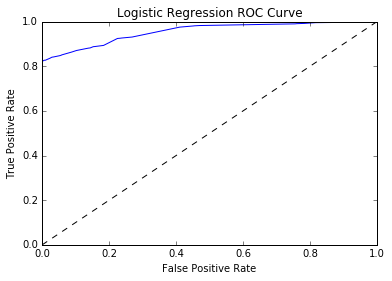


 Test data
              precision    recall  f1-score   support

           0       0.70      0.85      0.76     18723
           1       0.95      0.89      0.92     62115

   micro avg       0.88      0.88      0.88     80838
   macro avg       0.82      0.87      0.84     80838
weighted avg       0.89      0.88      0.88     80838

()
Confusion matrix
[[15855  2868]
 [ 6931 55184]]
()

 Accuracy for Logistic Regression: 87.81  

 print Area Under curve score: 0.95514
0.9546237968007586


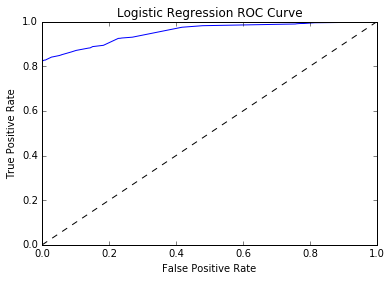

Number of features 7
Selected features [False False False False False False False False  True  True  True False
 False  True  True False False False False False False  True False False
  True]
Feature rank [11 17 13 16 15 14 19 10  1  1  1  6 12  1  1  3  2  8  7  4 18  1  9  5
  1]
Best parameter is 0.1 with score is 0.878101128808
Test data accuracy score with GridSearchCV: 0.87878225587

Training data
              precision    recall  f1-score   support

           0       0.69      0.85      0.76     74872
           1       0.95      0.89      0.92    248478

   micro avg       0.88      0.88      0.88    323350
   macro avg       0.82      0.87      0.84    323350
weighted avg       0.89      0.88      0.88    323350

Confusion matrix
[[ 63390  11482]
 [ 27934 220544]]

 Accuracy for Logistic Regression: 87.81  

print Area Under curve score: 0.95514 


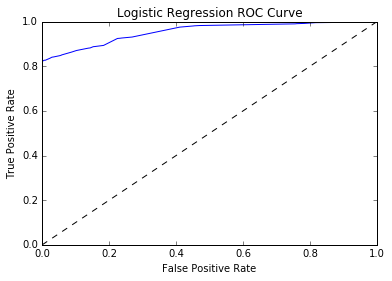


 Test data
              precision    recall  f1-score   support

           0       0.70      0.85      0.76     18723
           1       0.95      0.89      0.92     62115

   micro avg       0.88      0.88      0.88     80838
   macro avg       0.82      0.87      0.84     80838
weighted avg       0.89      0.88      0.88     80838

()
Confusion matrix
[[15855  2868]
 [ 6931 55184]]
()

 Accuracy for Logistic Regression: 87.81  

 print Area Under curve score: 0.95514
0.9546235521704046


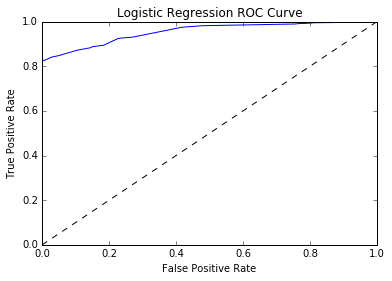

Number of features 6
Selected features [False False False False False False False False  True  True False False
 False  True  True False False False False False False  True False False
  True]
Feature rank [12 18 14 17 16 15 20 11  1  1  2  7 13  1  1  4  3  9  8  5 19  1 10  6
  1]
Best parameter is 0.001 with score is 0.891210762332
Test data accuracy score with GridSearchCV: 0.89128875034

Training data
              precision    recall  f1-score   support

           0       0.75      0.79      0.77     74872
           1       0.94      0.92      0.93    248478

   micro avg       0.89      0.89      0.89    323350
   macro avg       0.84      0.86      0.85    323350
weighted avg       0.89      0.89      0.89    323350

Confusion matrix
[[ 59499  15373]
 [ 19802 228676]]

 Accuracy for Logistic Regression: 89.12  

print Area Under curve score: 0.95418 


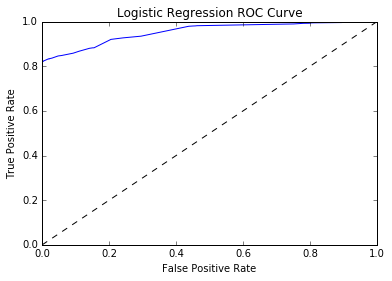


 Test data
              precision    recall  f1-score   support

           0       0.75      0.79      0.77     18723
           1       0.94      0.92      0.93     62115

   micro avg       0.89      0.89      0.89     80838
   macro avg       0.84      0.86      0.85     80838
weighted avg       0.89      0.89      0.89     80838

()
Confusion matrix
[[14852  3871]
 [ 4917 57198]]
()

 Accuracy for Logistic Regression: 89.12  

 print Area Under curve score: 0.95418
0.9536697715245789


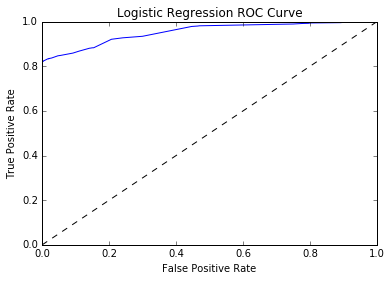

Number of features 5
Selected features [False False False False False False False False  True  True False False
 False  True  True False False False False False False  True False False
 False]
Feature rank [13 19 15 18 17 16 21 12  1  1  3  8 14  1  1  5  4 10  9  6 20  1 11  7
  2]
Best parameter is 0.001 with score is 0.883692593165
Test data accuracy score with GridSearchCV: 0.88209752839

Training data
              precision    recall  f1-score   support

           0       0.73      0.79      0.76     74872
           1       0.94      0.91      0.92    248478

   micro avg       0.88      0.88      0.88    323350
   macro avg       0.83      0.85      0.84    323350
weighted avg       0.89      0.88      0.89    323350

Confusion matrix
[[ 59312  15560]
 [ 22048 226430]]

 Accuracy for Logistic Regression: 88.37  

print Area Under curve score: 0.94383 


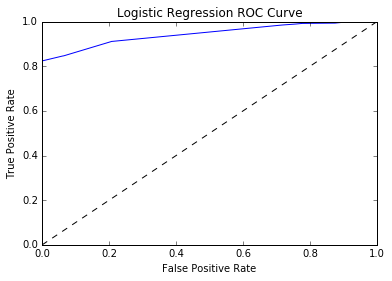


 Test data
              precision    recall  f1-score   support

           0       0.73      0.78      0.75     18723
           1       0.93      0.91      0.92     62115

   micro avg       0.88      0.88      0.88     80838
   macro avg       0.83      0.85      0.84     80838
weighted avg       0.89      0.88      0.88     80838

()
Confusion matrix
[[14679  4044]
 [ 5487 56628]]
()

 Accuracy for Logistic Regression: 88.37  

 print Area Under curve score: 0.94383
0.9433214320451121


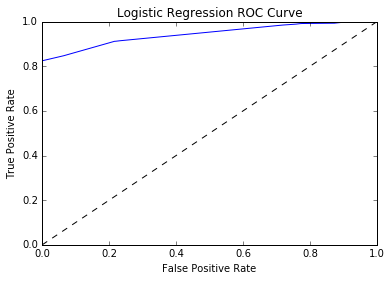

Number of features 4
Selected features [False False False False False False False False  True False False False
 False  True  True False False False False False False  True False False
 False]
Feature rank [14 20 16 19 18 17 22 13  1  2  4  9 15  1  1  6  5 11 10  7 21  1 12  8
  3]
Best parameter is 0.001 with score is 0.88197309417
Test data accuracy score with GridSearchCV: 0.880835745565

Training data
              precision    recall  f1-score   support

           0       0.73      0.78      0.75     74872
           1       0.93      0.91      0.92    248478

   micro avg       0.88      0.88      0.88    323350
   macro avg       0.83      0.85      0.84    323350
weighted avg       0.88      0.88      0.88    323350

Confusion matrix
[[ 58168  16704]
 [ 21460 227018]]

 Accuracy for Logistic Regression: 88.20  

print Area Under curve score: 0.94361 


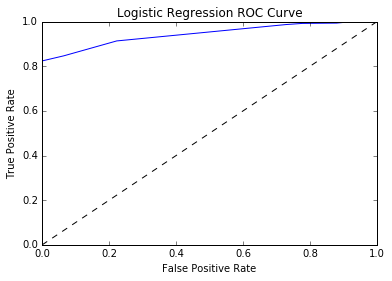


 Test data
              precision    recall  f1-score   support

           0       0.73      0.77      0.75     18723
           1       0.93      0.91      0.92     62115

   micro avg       0.88      0.88      0.88     80838
   macro avg       0.83      0.84      0.84     80838
weighted avg       0.88      0.88      0.88     80838

()
Confusion matrix
[[14429  4294]
 [ 5339 56776]]
()

 Accuracy for Logistic Regression: 88.20  

 print Area Under curve score: 0.94361
0.9432750296652999


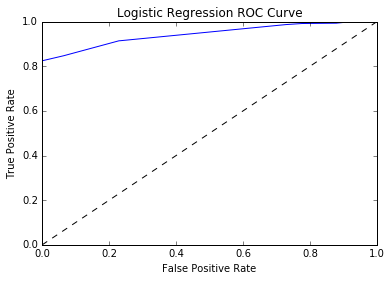

Number of features 3
Selected features [False False False False False False False False  True False False False
 False  True False False False False False False False  True False False
 False]
Feature rank [15 21 17 20 19 18 23 14  1  3  5 10 16  1  2  7  6 12 11  8 22  1 13  9
  4]
Best parameter is 0.001 with score is 0.86473171486
Test data accuracy score with GridSearchCV: 0.865162423613

Training data
              precision    recall  f1-score   support

           0       0.63      1.00      0.77     74872
           1       1.00      0.82      0.90    248478

   micro avg       0.86      0.86      0.86    323350
   macro avg       0.82      0.91      0.84    323350
weighted avg       0.91      0.86      0.87    323350

Confusion matrix
[[ 74872      0]
 [ 43739 204739]]

 Accuracy for Logistic Regression: 86.47  

print Area Under curve score: 0.92932 


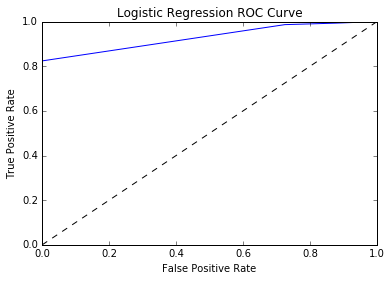


 Test data
              precision    recall  f1-score   support

           0       0.63      1.00      0.77     18723
           1       1.00      0.82      0.90     62115

   micro avg       0.87      0.87      0.87     80838
   macro avg       0.82      0.91      0.84     80838
weighted avg       0.91      0.87      0.87     80838

()
Confusion matrix
[[18723     0]
 [10900 51215]]
()

 Accuracy for Logistic Regression: 86.47  

 print Area Under curve score: 0.92932
0.9294715400936961


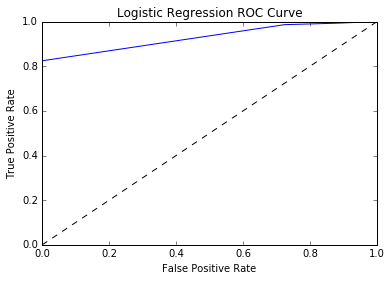

Number of features 2
Selected features [False False False False False False False False  True False False False
 False False False False False False False False False  True False False
 False]
Feature rank [16 22 18 21 20 19 24 15  1  4  6 11 17  2  3  8  7 13 12  9 23  1 14 10
  5]
Best parameter is 0.001 with score is 0.86473171486
Test data accuracy score with GridSearchCV: 0.865162423613

Training data
              precision    recall  f1-score   support

           0       0.63      1.00      0.77     74872
           1       1.00      0.82      0.90    248478

   micro avg       0.86      0.86      0.86    323350
   macro avg       0.82      0.91      0.84    323350
weighted avg       0.91      0.86      0.87    323350

Confusion matrix
[[ 74872      0]
 [ 43739 204739]]

 Accuracy for Logistic Regression: 86.47  

print Area Under curve score: 0.91199 


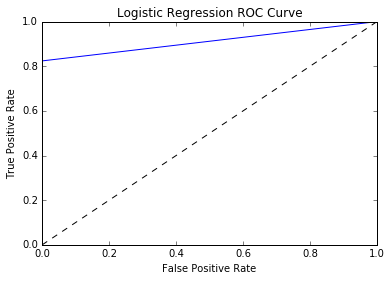


 Test data
              precision    recall  f1-score   support

           0       0.63      1.00      0.77     18723
           1       1.00      0.82      0.90     62115

   micro avg       0.87      0.87      0.87     80838
   macro avg       0.82      0.91      0.84     80838
weighted avg       0.91      0.87      0.87     80838

()
Confusion matrix
[[18723     0]
 [10900 51215]]
()

 Accuracy for Logistic Regression: 86.47  

 print Area Under curve score: 0.91199
0.9122595186347904


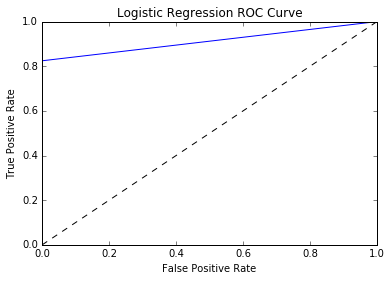

In [73]:
numberOfFeatures = len(features)
j=0;
logReg10 = LogisticRegression()
Cs = [0.001, 0.1, 1, 10, 100]
parameters = {"C": Cs}
for i in range(numberOfFeatures, 1, -1):
    rfe = RFE(logReg10, numberOfFeatures-j)
    xtrain, xtest, ytrain, ytest = train_test_split(waHomeLoanDF[features].values, 
                                              waHomeLoanDF['loan_approval'].values, test_size=.20, random_state=42)
    fit = rfe.fit(xtrain, ytrain)
    print("Number of features {}".format(fit.n_features_))
    print("Selected features {}".format(fit.support_))
    print("Feature rank {}".format(fit.ranking_))
    selectFeatureDict = dict(zip(features, fit.support_))
    selectedfeatures = list()
    for key, value in selectFeatureDict.items():
        if value:
            selectedfeatures.append(key)
    xtrain10, xtest10, ytrain10, ytest10 = train_test_split(waHomeLoanDF[selectedfeatures].values, 
                                              waHomeLoanDF['loan_approval'].values, test_size=.20, random_state=42)
    gridSearch = GridSearchCV(logReg10, param_grid=parameters, cv=5, scoring='accuracy')
    gridSearch.fit(xtrain10,ytrain10)
    print("Best parameter is {} with score is {}".format(gridSearch.best_params_['C'], gridSearch.best_score_))
    print('Test data accuracy score with GridSearchCV: {}'.format(gridSearch.score(xtest10,ytest10)))
    print("\nTraining data")
    ytrue, ypred = ytrain10, gridSearch.predict(xtrain10)
    print(classification_report(ytrue, ypred))
    print("Confusion matrix")
    print(confusion_matrix(ytrue, ypred))
    y_pred_prob = gridSearch.predict_proba(xtrain10)[:,1]
    print("\n Accuracy for Logistic Regression: %.2f  " % (accuracy_score(ytrue, ypred) * 100))
    print("\nprint Area Under curve score: %.5f " % (roc_auc_score(ytrue, y_pred_prob)))
    fpr, tpr, thresholds = roc_curve(ytrue, y_pred_prob)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='Logistic Regression')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Logistic Regression ROC Curve')
    plt.show()
    
    
    print("\n Test data")
    ytrue10, ypred10 = ytest10, gridSearch.predict(xtest10)
    print(classification_report(ytrue10, ypred10))
    print()
    print("Confusion matrix")
    print(confusion_matrix(ytrue10, ypred10))
    print()
    y_pred_prob10 = gridSearch.predict_proba(xtest10)[:,1]
    print("\n Accuracy for Logistic Regression: %.2f  " % (accuracy_score(ytrue, ypred) * 100))
    print("\n print Area Under curve score: %.5f" %(roc_auc_score(ytrue, y_pred_prob)))
    print(roc_auc_score(ytest10, y_pred_prob10))
    fpr, tpr, thresholds = roc_curve(ytest10, y_pred_prob10)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='Logistic Regression')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Logistic Regression ROC Curve')
    plt.show()
    j+=1

**Model with all 25 features produces best results**

In [76]:
#build logistic model using 25 features
logistReg = LogisticRegression(C=10)

In [77]:
xtrain, xtest, ytrain, ytest = train_test_split(waHomeLoanDF[features].values, 
                                                waHomeLoanDF['loan_approval'].values, test_size=.20, random_state=42)

In [78]:
logistReg.fit(xtrain, ytrain)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


Training data
              precision    recall  f1-score   support

           0       0.78      0.77      0.77     74872
           1       0.93      0.93      0.93    248478

   micro avg       0.90      0.90      0.90    323350
   macro avg       0.85      0.85      0.85    323350
weighted avg       0.89      0.90      0.89    323350

Confusion matrix
[[ 57378  17494]
 [ 16410 232068]]

 Accuracy for Logistic Regression: 89.51  

print Area Under curve score: 0.95682 


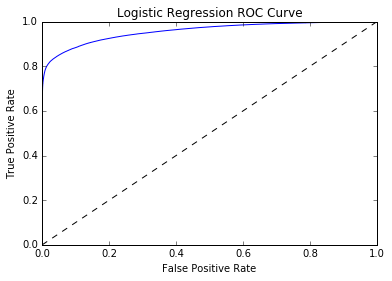


 Test data
              precision    recall  f1-score   support

           0       0.77      0.77      0.77     18723
           1       0.93      0.93      0.93     62115

   micro avg       0.89      0.89      0.89     80838
   macro avg       0.85      0.85      0.85     80838
weighted avg       0.89      0.89      0.89     80838

Confusion matrix
[[14377  4346]
 [ 4203 57912]]

 Accuracy for Logistic Regression: 89.42  

 print Area Under curve score: 0.95614


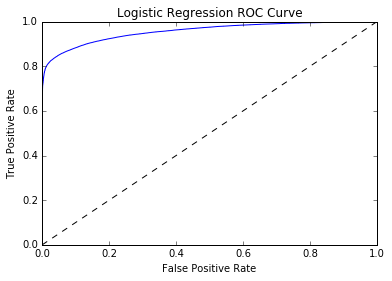

In [82]:
print("\nTraining data")
ytrue, ypred = ytrain, logistReg.predict(xtrain)
print(classification_report(ytrue, ypred))
print("Confusion matrix")
print(confusion_matrix(ytrue, ypred))
y_pred_prob = logistReg.predict_proba(xtrain)[:,1]
print("\n Accuracy for Logistic Regression: %.2f  " % (accuracy_score(ytrue, ypred) * 100))
print("\nprint Area Under curve score: %.5f " % (roc_auc_score(ytrue, y_pred_prob)))
fpr, tpr, thresholds = roc_curve(ytrue, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()
    
    
print("\n Test data")
ytrue10, ypred10 = ytest, logistReg.predict(xtest)
print(classification_report(ytrue10, ypred10))
print("Confusion matrix")
print(confusion_matrix(ytrue10, ypred10))
y_pred_prob10 = logistReg.predict_proba(xtest)[:,1]
print("\n Accuracy for Logistic Regression: %.2f  " % (accuracy_score(ytrue10, ypred10) * 100))
print("\n print Area Under curve score: %.5f" %(roc_auc_score(ytrue10, y_pred_prob10)))
fpr, tpr, thresholds = roc_curve(ytrue10, y_pred_prob10)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [83]:
#coeffLogistReg = gridSearch.best_estimator_.coef_
coeffLogistReg = logistReg.coef_.tolist()
coeff = dict(zip(features, coeffLogistReg[0]))

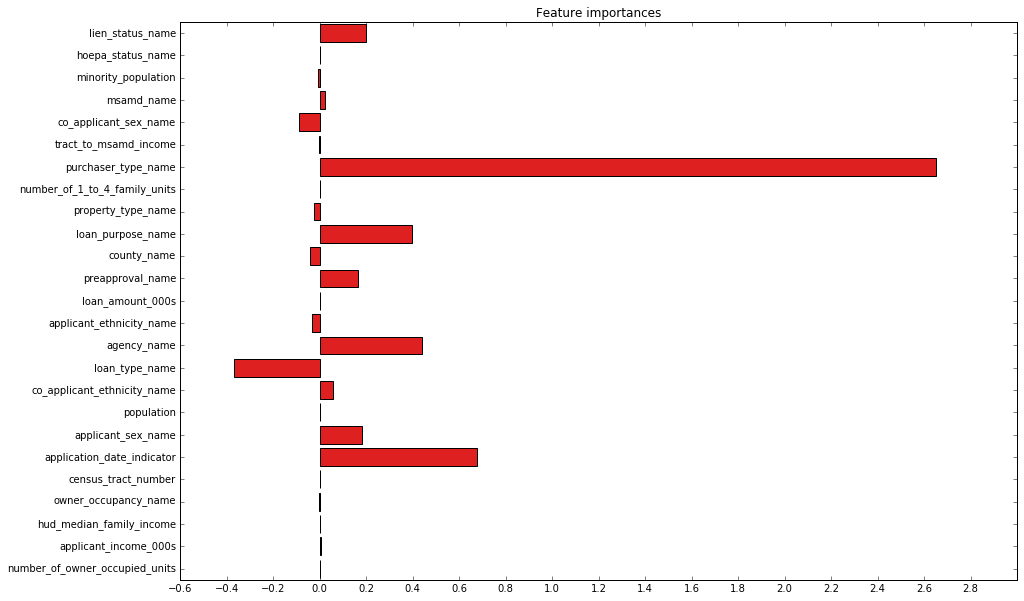

In [86]:
plt.subplots(figsize=(15,10))
plt.title("Feature importances")
#fig, ax = plt.subplots(figsize=(15,5))
ax = sns.barplot(coeff.values(), coeff.keys(), color='r')
plt.xticks(np.arange(-0.6, 3.0, 0.2))
#plt.xlim([-1, xtrain.shape[1]])
plt.show()

### Findings

**Precision and Recall**

| class  | precision | recall | f1-score |  support  |
|--------|-----------|--------|----------|-----------|
| 0      | 0.77      | 0.77   |   0.77   |  18723    |
| 1      | 0.93      | 0.93   |   0.93   |  62115    |

**Confusion Matrix**

|               | Predicted 0 | Predicted 1 |
|---------------|-------------|-------------|
| Actual 0      |14377        | 4346        |   
| Actual 1      |4203         | 57912       |

**Accuracy Score : **  89.42

**Area Under curve score** : 0.894245280685

### Stats model

For **Logit** and **GLM - Binomial Family** all features will be trained.

In [87]:
#Split data for taining and test.
xtrain, xtest, ytrain, ytest = train_test_split(waHomeLoanDF[features].values, 
                                              waHomeLoanDF['loan_approval'].values, test_size=.20, random_state=42)

In [88]:
#import models
from statsmodels.discrete.discrete_model import Logit

In [89]:
logit_model = Logit(ytrain, xtrain)

In [90]:
logit_res = logit_model.fit()

         Current function value: 0.202891
         Iterations: 35


In [91]:
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               323350
Model:                          Logit   Df Residuals:                   323325
Method:                           MLE   Df Model:                           24
Date:                Sun, 17 Feb 2019   Pseudo R-squ.:                  0.6251
Time:                        19:32:53   Log-Likelihood:                -65605.
converged:                      False   LL-Null:                   -1.7498e+05
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0018      0.000     -6.101      0.000      -0.002      -0.001
x2         -2.512e-05   8.39e-06     -2.992      0.003   -4.16e-05   -8.67e-06
x3            -0.0058      0.001     -9.197      0.0

In [92]:
#non-significant features.
print(features[8])
print(features[16])
print(features[21])

purchaser_type_name
hoepa_status_name
application_date_indicator


In [93]:
logit_predict_train = logit_res.predict(xtrain)

In [94]:
logit_predict = logit_res.predict(xtest)

In [95]:
# output of logit predict is a probability so threshold is applied
logit_predict_pro = [1 if i >= 0.5 else 0 for i in logit_predict]
logit_predict_pro_train = [1 if i >= 0.5 else 0 for i in logit_predict_train]

training data
              precision    recall  f1-score   support

           0       0.75      0.84      0.79     74872
           1       0.95      0.92      0.93    248478

   micro avg       0.90      0.90      0.90    323350
   macro avg       0.85      0.88      0.86    323350
weighted avg       0.90      0.90      0.90    323350

Confusion matrix
[[ 62523  12349]
 [ 21113 227365]]

 Accuracy for Logit model: 89.65  

 print Area Under curve score: 0.95933


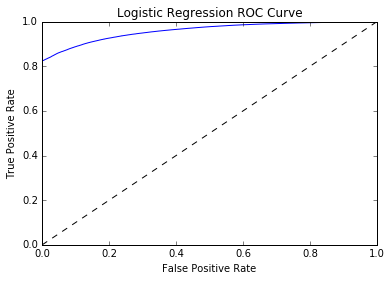

Test data
              precision    recall  f1-score   support

           0       0.74      0.83      0.79     18723
           1       0.95      0.91      0.93     62115

   micro avg       0.90      0.90      0.90     80838
   macro avg       0.85      0.87      0.86     80838
weighted avg       0.90      0.90      0.90     80838

Confusion matrix
[[15624  3099]
 [ 5350 56765]]

 Accuracy for Logit model: 89.55  

 print Area Under curve score: 0.95870


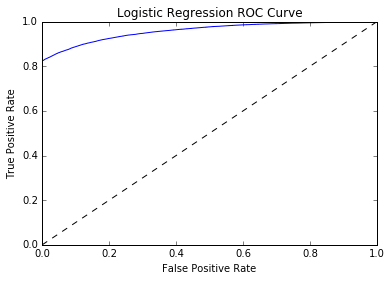

In [96]:
# compute confusion and precision and Recall
print("training data")
ytrue, ypred = ytrain, logit_predict_pro_train

print(classification_report(ytrue, ypred))
print("Confusion matrix")
print(confusion_matrix(ytrue, ypred))
print("\n Accuracy for Logit model: %.2f  " % (accuracy_score(ytrue, ypred) * 100))
print("\n print Area Under curve score: %.5f" % (roc_auc_score(ytrue, logit_predict_train)))
fpr, tpr, thresholds = roc_curve(ytrue, logit_predict_train)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

#Precision and recall for test data
print("Test data")
ytrue, ypred = ytest, logit_predict_pro
print(classification_report(ytrue, ypred))
print("Confusion matrix")
print(confusion_matrix(ytrue, ypred))


#y_pred_prob10 = gridSearch.predict_proba(xtest)[:,1]
print("\n Accuracy for Logit model: %.2f  " % (accuracy_score(ytrue, ypred) * 100))
print("\n print Area Under curve score: %.5f" % (roc_auc_score(ytrue, logit_predict)))

fpr, tpr, thresholds = roc_curve(ytrue, logit_predict)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

**Logit** and **GLM - Binomial Family** both produce same results.

Following features are of no importance.
- purchaser_type_name
- hoepa_status_name
- application_date_indicator

Apart from above mentioned all other features are significant for the model.

### GLM - Binomial Family

In [87]:
model1 = sm.GLM(ytrain, xtrain, family=sm.families.Binomial())

In [88]:
model_result1 = model1.fit()

In [89]:
print(model_result1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:               323350
Model:                            GLM   Df Residuals:                   323325
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 14 Feb 2019   Deviance:                          nan
Time:                        22:53:22   Pearson chi2:                 1.19e+05
No. Iterations:                   100   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0018      0.000     -6.101      0.000      -0.002      -0.001
x2         -2.512e-05   8.39e-06     -2.992      0.0

In [90]:
res_predict = model_result1.predict(xtest)

In [91]:
# output of GLM binary family prediction is a probability so threshold is applied
res_predict_binary = [1 if i >= 0.5 else 0 for i in res_predict]

              precision    recall  f1-score   support

           0       0.74      0.83      0.79     18723
           1       0.95      0.91      0.93     62115

   micro avg       0.90      0.90      0.90     80838
   macro avg       0.85      0.87      0.86     80838
weighted avg       0.90      0.90      0.90     80838

Confusion matrix
[[15624  3099]
 [ 5350 56765]]

 Accuracy for GLM Binomial Family : 89.55  

 print Area Under curve score: 0.95870


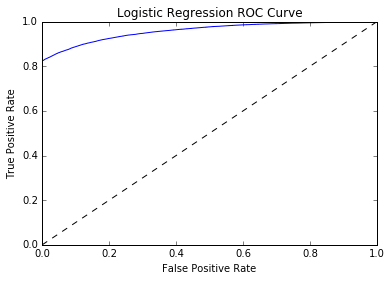

In [93]:
# compute confusion and precision and Recall
ytrue, ypred = ytest, res_predict_binary
print(classification_report(ytrue, ypred))
print("Confusion matrix")
print(confusion_matrix(ytrue, ypred))

print("\n Accuracy for GLM Binomial Family : %.2f  " % (accuracy_score(ytrue, ypred) * 100))
print("\n print Area Under curve score: %.5f" % (roc_auc_score(ytrue, res_predict)))

fpr, tpr, thresholds = roc_curve(ytrue, res_predict)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

### Findings

**Precision and Recall**

| class  | precision | recall | f1-score |  support  |
|--------|-----------|--------|----------|-----------|
| 0      |0.74      | 0.83   |   0.79   |  18723    |
| 1      | 0.95      | 0.91   |   0.93   |  62115    |

**Confusion Matrix**

|               | Predicted 0 | Predicted 1 |
|---------------|-------------|-------------|
| Actual 0      |15624        | 3099        |   
| Actual 1      |5350         | 56765       |

**Accuracy Score : **  89.55

**Area Under curve score** : 0.95870

## Random Forest 

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In this model hyperparameters are tuned using **RandomizedSearchCV**. Hyperparameters found in RandomizedSearchCV are used to for learning **RandomForestClassifier**. This model is tested on test data and evaluate using accuracy, precision and recall, and confusion matrix.

Feature importance is calculated on this trained model

In [102]:
xtrain, xtest, ytrain, ytest = train_test_split(waHomeLoanDF[features].values, 
                                              waHomeLoanDF['loan_approval'].values, test_size=.20, random_state=42)

In [103]:
rf = RandomForestClassifier(n_jobs = -1)

**Hyperparameters**

n_estimators - the number of trees in the forest. Usually higher number of trees the better to learn the data.

max_features - number of features to consider when looking for the best split

max_depth - depth of the tree, the more splits it has and it captures more information about the data. But as the tree gets very deep, it might lead to overfitting

min_samples_split - number of samples required to split an internal node. smaller samples might lead to overfitting.

min_samples_leaf - The minimum number of samples required to be at a leaf node. smaller samples might lead to overfitting.


In [104]:
n_estimators = [4, 8, 16, 32, 64, 100, 200]
criterion = ['gini','entropy']
max_features = [2, 4, 5, 10, 15, 20, 25]
min_samples_split = [2, 4, 6, 8, 10, 12, 16, 32, 64]
min_samples_leaf = [2, 4, 6, 8, 10, 12, 16, 32, 64]
max_depth = [4, 8, 10, 12, 16, 32, 64]
bootstrap = [True, False]
param_grid = {'n_estimators': n_estimators,
              'criterion': criterion,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'max_features': max_features,
              'max_depth':max_depth,
              'bootstrap': bootstrap}

In [105]:
randomSearchCv = RandomizedSearchCV(rf, param_distributions=param_grid, cv=5, scoring='accuracy')

In [106]:
randomSearchCv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'bootstrap': [True, False], 'min_samples_leaf': [2, 4, 6, 8, 10, 12, 16, 32, 64], 'n_estimators': [4, 8, 16, 32, 64, 100, 200], 'max_features': [2, 4, 5, 10, 15, 20, 25], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 4, 6, 8, 10, 12, 16, 32, 64], 'max_depth': [4, 8, 10, 12, 16, 32, 64]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='war

In [107]:
print("Best parameter is {} with score is {}".format(randomSearchCv.best_params_, randomSearchCv.best_score_))
print('Test data accuracy score with GridSearchCV: {}'.format(randomSearchCv.score(xtest,ytest)))

Best parameter is {'bootstrap': False, 'min_samples_leaf': 8, 'n_estimators': 200, 'max_features': 10, 'criterion': 'gini', 'min_samples_split': 4, 'max_depth': 12} with score is 0.911922065873
Test data accuracy score with GridSearchCV: 0.912071055692


Train Data
              precision    recall  f1-score   support

           0       0.80      0.84      0.82     74872
           1       0.95      0.94      0.95    248478

   micro avg       0.92      0.92      0.92    323350
   macro avg       0.88      0.89      0.88    323350
weighted avg       0.92      0.92      0.92    323350

Confusion matrix
[[ 63157  11715]
 [ 15318 233160]]
Accuracy for Random Forest: 91.64 

print Area Under curve score: 0.97363


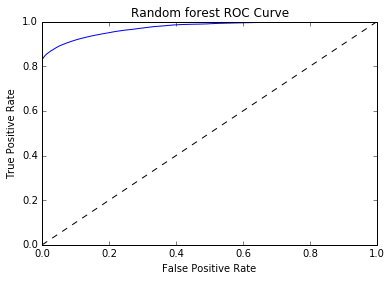

Test Data
              precision    recall  f1-score   support

           0       0.80      0.83      0.81     18723
           1       0.95      0.94      0.94     62115

   micro avg       0.91      0.91      0.91     80838
   macro avg       0.87      0.88      0.88     80838
weighted avg       0.91      0.91      0.91     80838

Confusion matrix
[[15609  3114]
 [ 3994 58121]]
Accuracy for Random Forest: 91.21 

print Area Under curve score : 0.97015


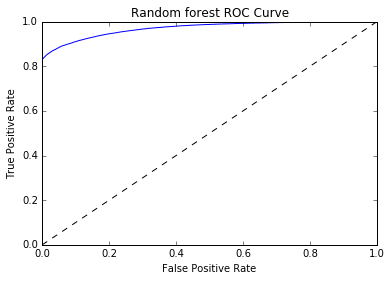

In [112]:
#For training data
print("Train Data")
ytrue, ypred = ytrain, randomSearchCv.predict(xtrain)
print(classification_report(ytrue, ypred))
print("Confusion matrix")
print(confusion_matrix(ytrue, ypred))
y_pred_prob = randomSearchCv.predict_proba(xtrain)[:,1]
print("Accuracy for Random Forest: %.2f \n" % (accuracy_score(ytrue, ypred) * 100))
print("print Area Under curve score: %.5f" % (roc_auc_score(ytrue, y_pred_prob)))
fpr, tpr, thresholds = roc_curve(ytrue, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random forest ROC Curve')
plt.show()

#for test data
print("Test Data")
ytrue, ypred = ytest, randomSearchCv.predict(xtest)
print(classification_report(ytrue, ypred))
print("Confusion matrix")
print(confusion_matrix(ytrue, ypred))
print("Accuracy for Random Forest: %.2f \n" % (accuracy_score(ytrue, ypred) * 100))
y_pred_prob = randomSearchCv.predict_proba(xtest)[:,1]
print("print Area Under curve score : %.5f" %(roc_auc_score(ytrue, y_pred_prob)))
fpr, tpr, thresholds = roc_curve(ytrue, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random forest ROC Curve')
plt.show()

#### Feature importance

In [118]:
featureImpList = randomSearchCv.best_estimator_.feature_importances_
featureImpRF = dict(zip(features, featureImpList.tolist()))

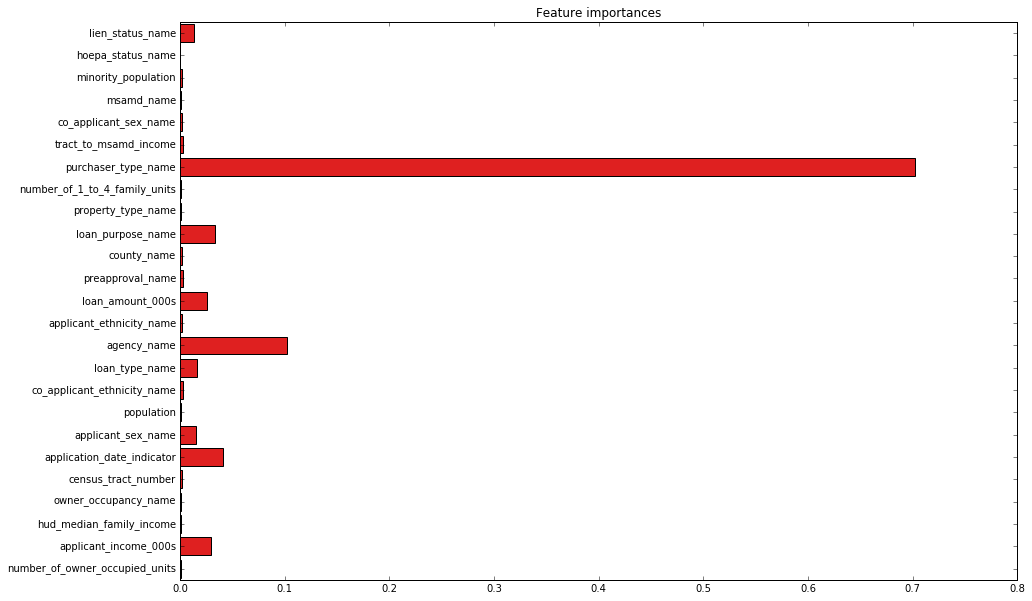

In [122]:
plt.subplots(figsize=(15,10))
plt.title("Feature importances")
ax = sns.barplot(featureImpRF.values(), featureImpRF.keys(), color='r')
plt.show()

### Findings

**Precision and Recall** 

| class  | precision | recall | f1-score |  support  |
|--------|-----------|--------|----------|-----------|
| 0      | 0.80      | 0.83   |   0.81   |  18723    |
| 1      | 0.95      | 0.94   |   0.94   |  62115    |

**Confusion Matrix**

|               | Predicted 0 | Predicted 1 |
|---------------|-------------|-------------|
| Actual 0      |15609        | 3114        |   
| Actual 1      |3994         | 58121       |

**Accuracy for Random Forest** : 91.21

**Area Under curve score** : 0.97015

## XGBOOST

In [40]:
import xgboost as xgb

In this model hyperparameters are tuned using **RandomizedSearchCV**. Hyperparameters found in **RandomizedSearchCV** are used to for learning **XGBClassifier**. This model is tested on test data and evaluate using accuracy, precision and recall, and confusion matrix.

Feature importance is calculated on this trained model.

In [61]:
xg_log1 = xgb.XGBClassifier(objective = "binary:logistic", silent=True, subsample=0.8, learning_rate=0.1, n_jobs=-1)

**Hyperparameters Tuning**

n_estimators - number of trees to grow. Larger the tree size better the model, but more numbers of trees can be computationally expensive and affects the performance of the model

max_depth - depth of the tree, the more splits it has and it captures more information about the data. But as the tree gets very deep, it might lead to overfitting

min_child_weight - Minimum sum of instance weight needed in a child.

gamma - [0.1, 0.2, 0.3, 0.4, 0.5]

colsample_bytree - Subsample ratio of columns when constructing each tree

colsample_bylevel - Subsample ratio of columns for each split, in each level

In [62]:
n_estimators = [4, 8, 16, 32, 64, 100, 200]
max_depth = [4, 8, 10, 12, 16, 32, 64]
min_child_weight = [2, 4, 6, 8, 10, 12, 16, 32, 64]
gamma = [i/10.0 for i in range(0,5)]
colsample_bytree = [0.2, 0.4, 0.6, 0.8]
colsample_bylevel = [0.2, 0.4, 0.6, 0.8]
params_xgb = {'n_estimators': n_estimators, 
              'max_depth': max_depth, 
              'min_child_weight': min_child_weight, 
              'gamma': gamma, 
              'colsample_bytree': colsample_bytree, 
              'colsample_bylevel':colsample_bylevel}

In [63]:
xtrain10, xtest10, ytrain10, ytest10 = train_test_split(waHomeLoanDF[features].values, 
                                              waHomeLoanDF['loan_approval'].values, test_size=.20, random_state=42)

In [64]:
 xgb_randomSearchCv = RandomizedSearchCV(xg_log1, param_distributions=params_xgb, cv=5, scoring='accuracy')

In [65]:
xgb_randomSearchCv.fit(xtrain10, ytrain10)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.8),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'colsample_bytree': [0.2, 0.4, 0.6, 0.8], 'colsample_bylevel': [0.2, 0.4, 0.6, 0.8], 'min_child_weight': [2, 4, 6, 8, 10, 12, 16, 32, 64], 'n_estimators': [4, 8, 16, 32, 64, 100, 200], 'max_depth': [4, 8, 10, 12, 16, 32, 64], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [66]:
print("Best parameter is {} with score is {}".format(xgb_randomSearchCv.best_params_, xgb_randomSearchCv.best_score_))
print('Test data accuracy score with GridSearchCV: {}'.format(xgb_randomSearchCv.score(xtest10,ytest10)))

Best parameter is {'colsample_bytree': 0.8, 'colsample_bylevel': 0.2, 'min_child_weight': 64, 'n_estimators': 64, 'max_depth': 32, 'gamma': 0.3} with score is 0.91256223906
Test data accuracy score with GridSearchCV: 0.913518394814


Train Data
              precision    recall  f1-score   support

           0       0.81      0.85      0.83     74872
           1       0.95      0.94      0.95    248478

   micro avg       0.92      0.92      0.92    323350
   macro avg       0.88      0.90      0.89    323350
weighted avg       0.92      0.92      0.92    323350

Confusion matrix
[[ 63644  11228]
 [ 14538 233940]]
Accuracy for XGBOOST: 92.03 

print Area Under curve score: 0.97434


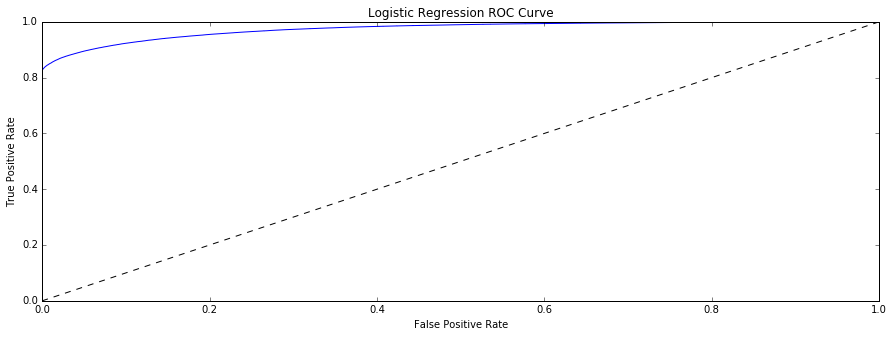

Test Data
              precision    recall  f1-score   support

           0       0.80      0.83      0.82     18723
           1       0.95      0.94      0.94     62115

   micro avg       0.91      0.91      0.91     80838
   macro avg       0.88      0.89      0.88     80838
weighted avg       0.91      0.91      0.91     80838

Confusion matrix
[[15621  3102]
 [ 3889 58226]]
Accuracy for XGBOOST: 91.35 

print Area Under curve score: 0.97056


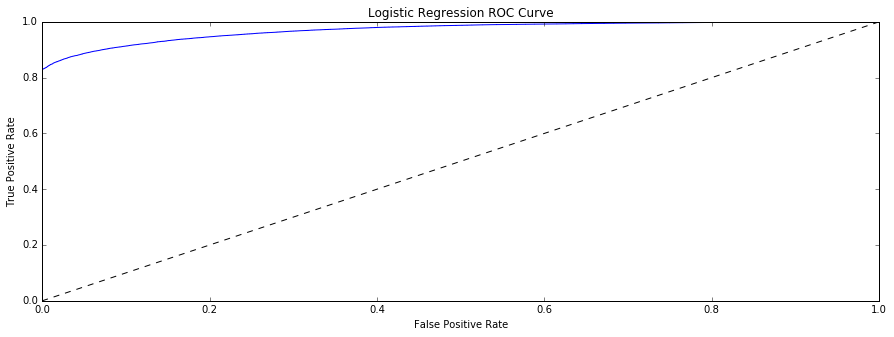

In [67]:
print("Train Data")
ytrue10, ypred10 = ytrain10, xgb_randomSearchCv.predict(xtrain10)
print(classification_report(ytrue10, ypred10))
print("Confusion matrix")
print(confusion_matrix(ytrue10, ypred10))
y_pred_prob10 = xgb_randomSearchCv.predict_proba(xtrain10)[:,1]
print("Accuracy for XGBOOST: %.2f \n" % (accuracy_score(ytrue10, ypred10) * 100))
print("print Area Under curve score: %.5f"% (roc_auc_score(ytrue10, y_pred_prob10)))
fpr, tpr, thresholds = roc_curve(ytrue10, y_pred_prob10)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

print("Test Data")
ytrue10, ypred10 = ytest10, xgb_randomSearchCv.predict(xtest10)
print(classification_report(ytrue10, ypred10))
print("Confusion matrix")
print(confusion_matrix(ytrue10, ypred10))
y_pred_prob10 = xgb_randomSearchCv.predict_proba(xtest10)[:,1]
print("Accuracy for XGBOOST: %.2f \n" % (accuracy_score(ytrue10, ypred10) * 100))
print("print Area Under curve score: %.5f" %(roc_auc_score(ytest10, y_pred_prob10)))
fpr, tpr, thresholds = roc_curve(ytest10, y_pred_prob10)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

#### Feature Importance

In [70]:
featureImpList_xgb = xgb_randomSearchCv.best_estimator_.feature_importances_
featureImp_xgb = dict(zip(features, featureImpList_xgb.tolist()))

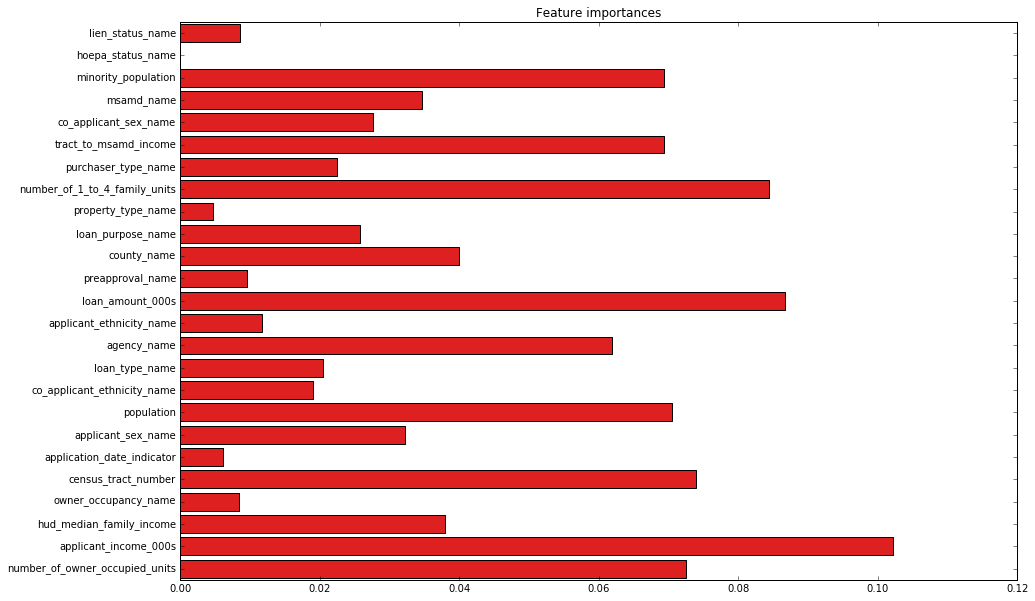

In [71]:
plt.subplots(figsize=(15,10))
plt.title("Feature importances")
ax = sns.barplot(featureImp_xgb.values(), featureImp_xgb.keys(), color='r')
plt.show()

### Findings

**Precision and Recall**

| class  | precision | recall | f1-score |  support  |
|--------|-----------|--------|----------|-----------|
| 0      | 0.80      | 0.83   |   0.82   |  18723    |
| 1      | 0.95      | 0.94   |   0.94   |  62115    |

**Confusion Matrix**

|               | Predicted 0 | Predicted 1 |
|---------------|-------------|-------------|
| Actual 0      |15403        | 3320        |   
| Actual 1      |3711         | 58404       |

**Accuracy for Random Forest** : 91.35 

**Area Under curve score** : 0.97056

# Conclusion

#### SK Learn Logistic Regression

**Precision and Recall**

| class  | precision | recall | f1-score |  support  |
|--------|-----------|--------|----------|-----------|
| 0      | 0.77      | 0.77   |   0.77   |  18723    |
| 1      | 0.93      | 0.93   |   0.93   |  62115    |

**Confusion Matrix**

|               | Predicted 0 | Predicted 1 |
|---------------|-------------|-------------|
| Actual 0      |14377        | 4346        |   
| Actual 1      |4203         | 57912       |

**Accuracy Score : **  89.42

**Area Under curve score** : 0.894245280685

#### Stats Model

**Precision and Recall**

| class  | precision | recall | f1-score |  support  |
|--------|-----------|--------|----------|-----------|
| 0      |0.74      | 0.83   |   0.79   |  18723    |
| 1      | 0.95      | 0.91   |   0.93   |  62115    |

**Confusion Matrix**

|               | Predicted 0 | Predicted 1 |
|---------------|-------------|-------------|
| Actual 0      |15624        | 3099        |   
| Actual 1      |5350         | 56765       |

**Accuracy Score : **  89.55

**Area Under curve score** : 0.95870

#### Random Forest

**Precision and Recall** 

| class  | precision | recall | f1-score |  support  |
|--------|-----------|--------|----------|-----------|
| 0      | 0.80      | 0.83   |   0.81   |  18723    |
| 1      | 0.95      | 0.94   |   0.94   |  62115    |

**Confusion Matrix**

|               | Predicted 0 | Predicted 1 |
|---------------|-------------|-------------|
| Actual 0      |15609        | 3114        |   
| Actual 1      |3994         | 58121       |

**Accuracy for Random Forest** : 91.21

**Area Under curve score** : 0.97015

#### XGBOOST

**Precision and Recall**

| class  | precision | recall | f1-score |  support  |
|--------|-----------|--------|----------|-----------|
| 0      | 0.80      | 0.83   |   0.82   |  18723    |
| 1      | 0.95      | 0.94   |   0.94   |  62115    |

**Confusion Matrix**

|               | Predicted 0 | Predicted 1 |
|---------------|-------------|-------------|
| Actual 0      |15403        | 3320        |   
| Actual 1      |3711         | 58404       |

**Accuracy for Random Forest** : 91.35 

**Area Under curve score** : 0.97056

Among all the four models, **XGBOOST** and **Random Forest** do better than other models. **XGBOOST** and **Random Forest** both have almost same performance. **XGBOOST** is 1% better(F1-Score) at predicting loan rejection rate than **Random Forest**.